In [1]:
# SPDX-FileCopyrightText: 2020 G2Elab / MAGE
#
# SPDX-License-Identifier: Apache-2.0

# if NoLoad is not installed 
!pip install noload --quiet

<H1>NoLoad tutorial</H1>
Based on test functions: <A href="https://en.wikipedia.org/wiki/Test_functions_for_optimization" target="_blank">https://en.wikipedia.org/wiki/Test_functions_for_optimization</A>


<H2>Constrained mono-objective optimization</H2>

<img src=".\img\bar2.png"/>
<img src=".\img\Simionescu.png"/>

<H3>function definition</H3>

In [2]:
def simionescu(x, y, rr, rs, n):
    import autograd.numpy as np
    fobj = 0.1 * x * y
    ctr = x * x + y * y - np.power(rr + rs * np.cos(n * np.arctan(x / y)), 2)
    return locals().items()

<H3>plot function</H3>

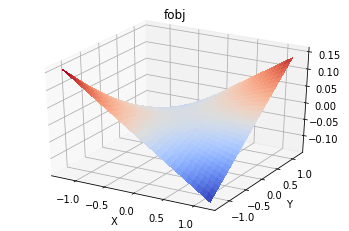

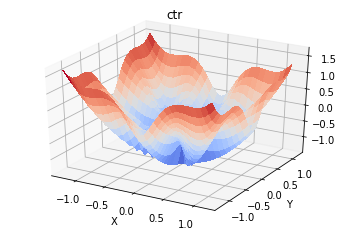

In [3]:
#Plot
from plotTools import plot3D
%matplotlib inline
plot3D(simionescu, [[-1.25,1.25],[-1.25,1.25]], outNames = ['fobj','ctr'], 
       parameters = (1,0.2,8))


<H3>optimize using NoLoad</H3>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.07200000071111702
            Iterations: 17
            Function evaluations: 21
            Gradient evaluations: 17
{'x': -0.8485283132529143, 'y': 0.8485279699754288}
{'fobj': -0.07200000071111702, 'ctr': 1.4223086486353509e-08}


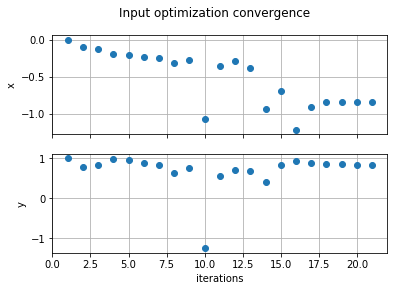

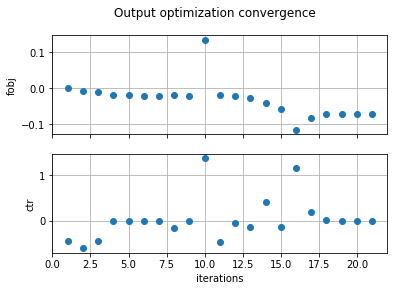

In [4]:
#Optimize
from noload.optimization.optimProblem import Spec, OptimProblem
#This function is non defined in [0,0], initial guess must be different
# from [0,0]
spec = Spec(variables={'x':0, 'y':1}, bounds={'x':[-1.25, 1.25], 
            'y':[-1.25, 1.25]}, objectives={'fobj':[0.,0.15]},
            ineq_cstr={'ctr':[None, 0]} #inequality constraints
            )
optim = OptimProblem(model=simionescu, specifications=spec,
                     parameters={'rr':1, 'rs':0.2, 'n':8})
result = optim.run()

result.printResults()
result.plotResults()

In [5]:
#It is also possible to iterate by yourself to get results
for name, value in result.getLastInputs().items():
    print(name, '  \t =', value)
for name, value in result.getLastOutputs().items():
    print(name, '  \t =', value)


x   	 = -0.8485283132529143
y   	 = 0.8485279699754288
fobj   	 = -0.07200000071111702
ctr   	 = 1.4223086486353509e-08
